# State Farm Classification Coding Exercise

## Part 4 - Build a Logistic Regression Model

### A. Construct Logistic Regression Model Upon Training Data

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import training model data into a Pandas dataframe called train_model1. **

In [3]:
train_model1 = pd.read_pickle('../State_Farm/Data/train_model.pickle')

** Check number of rows and columns in train_model1 dataframe. **

In [4]:
train_model1.shape

(40000, 15)

** View structure of train_model1 dataframe. **

In [5]:
train_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
y          40000 non-null int64
x75        40000 non-null float64
x37        40000 non-null float64
x58        40000 non-null float64
x97        40000 non-null float64
x41_flt    40000 non-null float64
x99        40000 non-null float64
x1         40000 non-null float64
x40        40000 non-null float64
x70        40000 non-null float64
x44        40000 non-null float64
x63        40000 non-null float64
x56        40000 non-null float64
x83        40000 non-null float64
x96        40000 non-null float64
dtypes: float64(14), int64(1)
memory usage: 4.6 MB


** View first five rows of train_model1 dataframe. **

In [6]:
train_model1.head()

,y,x75,x37,x58,x97,x41_flt,x99,x1,x40,x70,x44,x63,x56,x83,x96
0,0,40.617107,-10.839200,2.078396,-2.125570,449.48,1.237667,74.425320,4.550518,41.040206,-104.388382,4.036426,34.030184,1.885149,26.238591
1,1,-49.303165,57.917006,-2.696257,-36.030599,-525.06,1.952183,24.320711,-9.476135,36.204784,-65.535823,-4.809269,-49.979634,-0.333381,-15.141647
2,1,-19.706659,-12.991058,-2.417447,26.212736,-599.50,0.558988,-66.160459,6.876065,49.538602,4.719628,16.889265,15.147122,9.341546,-19.914894
3,0,-7.301283,37.658926,4.443710,19.221130,-220.71,0.214462,33.210943,-16.933984,82.130387,26.053787,-21.680531,34.361817,-2.007231,-27.197636
4,0,-2.751656,-59.497091,-2.421952,-5.703269,-1405.59,-1.191319,-26.717872,-9.551514,-19.154066,52.808773,3.210319,24.488505,-0.546353,33.383803


** Gather summary statistics of train_model1 dataframe. **

In [7]:
train_model1.describe()

,y,x75,x37,x58,x97,x41_flt,x99,x1,x40,x70,x44,x63,x56,x83,x96
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.20360,5.417519,4.814694,-0.892583,-2.514305,0.315315,0.043218,-7.788884,1.849224,6.884965,-21.624920,-2.673378,-1.489671,0.207667,-0.807556
std,0.40268,35.653631,31.561154,6.319470,18.551630,1001.659950,1.114263,37.010235,34.776971,37.411230,87.305224,13.869871,29.944783,4.964881,23.831724
min,0.00000,-146.967384,-127.651997,-31.395877,-73.908741,-4496.460000,-4.376614,-157.341119,-141.837976,-135.730347,-423.119841,-65.169968,-128.052246,-22.231100,-108.474714
25%,0.00000,-17.971049,-16.589036,-5.175537,-15.023076,-669.295000,-0.710450,-32.728985,-22.000674,-17.958766,-76.471492,-12.014266,-21.410198,-3.144923,-16.824117
50%,0.00000,5.592658,4.493183,-0.891371,-2.514305,6.040000,0.042895,-7.988907,1.142136,6.961203,-19.049291,-2.785817,-1.340681,0.201012,-0.661772
75%,0.00000,28.988799,25.968530,3.413382,9.882079,678.325000,0.797327,16.844355,24.990524,32.050751,36.706320,6.681694,18.721678,3.545705,15.267626
max,1.00000,144.548014,126.924294,22.420511,76.120119,4062.630000,4.490209,153.469221,159.813564,159.477026,314.770732,55.601781,132.980539,19.617204,92.926545


** Define X and y. **

In [8]:
feature_cols = ['x75', 'x37', 'x58', 'x97', 'x41_flt', 'x99', 'x1', 'x40', 'x70', 'x44', 'x63', 'x56', 'x83', 'x96']

In [9]:
X = train_model1[feature_cols]
y = train_model1['y']
print(X.shape)
print(y.shape)

(40000, 14)
(40000,)


** Fit a logistic regression model on training model data. **

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

** Print logistic regression model intercept and coefficients. **

In [12]:
print(logreg.intercept_)
dict(zip(feature_cols, logreg.coef_[0]))

[-1.3847385]


{'x1': 0.007047416085280777,
 'x37': -0.016105211331098775,
 'x40': 0.00578891080883736,
 'x41_flt': -0.0003401854661650888,
 'x44': 0.006037683479860255,
 'x56': -0.009542535312387216,
 'x58': 0.11121565823866641,
 'x63': 0.029668912026681572,
 'x70': -0.005447882703786845,
 'x75': -0.023153039385620668,
 'x83': 0.08761590096736244,
 'x96': -0.010344079456438539,
 'x97': 0.03871572430063214,
 'x99': 0.4788438298145828}

** Express logistic regression model coefficients as odds. **

In [13]:
dict(zip(feature_cols, np.exp(logreg.coef_[0])))

{'x1': 1.007072307561193,
 'x37': 0.9840237841566418,
 'x40': 1.0058056989323634,
 'x41_flt': 0.9996598723903498,
 'x44': 1.0060559470287698,
 'x56': 0.9905028501986991,
 'x58': 1.1176359082580003,
 'x63': 1.0301134193228654,
 'x70': 0.9945669300975146,
 'x75': 0.977112935566845,
 'x83': 1.0915687709881947,
 'x96': 0.9897092365401361,
 'x97': 1.0394749441780715,
 'x99': 1.6142070248626739}

** Make predictions on training model data and calculate accuracy for training model data. **

In [14]:
y_pred_class = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred_class).round(3))

0.843


** Compute training model data null accuracy manually. **

In [15]:
print(1 - y.mean())

0.7964


** Calculate area under the ROC curve (AUC) value for training data logistic regression model. **

In [16]:
y_pred_prob = logreg.predict_proba(X)[:, 1]
print(metrics.roc_auc_score(y, y_pred_prob).round(3))

0.854


** Plot logistic regression model ROC curve for training data. **

Text(0,0.5,'True Positive Rate (Sensitivity)')

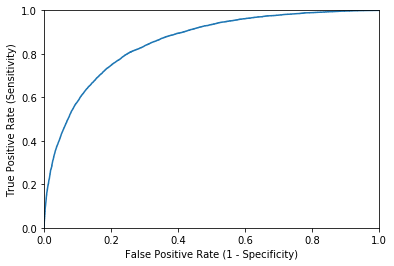

In [17]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

** Print confusion matrix to calculate training model data accuracy and error rates plus precision and recall. **

In [18]:
print(metrics.confusion_matrix(y, y_pred_class))

[[30265  1591]
 [ 4706  3438]]


** Calculate training model data accuracy rate. **

In [19]:
float(30265 + 3438) / float(30265 + 1591 + 4706 + 3438)

0.842575

** Calculate training model data misclassification / error rate. **

In [20]:
float(4706 + 1591) / float(30265 + 1591 + 4706 + 3438)

0.157425

** Calculate precision to measure how confident the logistic regression model is for capturing the positives in training model data. **

In [21]:
float(3438) / float(3438 + 1591)

0.6836349174786239

** Calculate recall / sensitivity to measure how well the logistic regression model is capturing the positives in training model data. **

In [22]:
float(3438) / float(4706 + 3438)

0.42215127701375244

** Calculate specificity to measure how well the logistic regression model is capturing the negatives in training model data. **

In [23]:
float(30265) / float(30265 + 1591)

0.9500565042692114

** Print out training model data classification report for logistic regression model. **

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y, y_pred_class))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91     31856
          1       0.68      0.42      0.52      8144

avg / total       0.83      0.84      0.83     40000



** List out training model data logistic regression model accuracy scores and their average using 10-fold cross-validation. **

In [26]:
from sklearn.cross_validation import cross_val_score

C:\Users\kyrma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
acc_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').round(3)
print(acc_scores)
print(acc_scores.mean().round(3))

[0.837 0.839 0.843 0.84  0.842 0.847 0.84  0.846 0.849 0.844]
0.843


** List out training model data logistic regression model AUC values and their average using 10-fold cross-validation. **

In [28]:
auc_scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').round(3)
print(auc_scores)
print(auc_scores.mean().round(3))

[0.849 0.845 0.849 0.854 0.85  0.86  0.853 0.854 0.87  0.858]
0.854


### B. Generate Predictions in Cleaned Test Data

** Import cleaned test data pickle file into a Pandas dataframe called test_model1. **

In [29]:
test_model1 = pd.read_pickle('../State_Farm/Data/test_model.pickle')

** Check number of rows and columns in test_model1 dataframe. **

In [30]:
test_model1.shape

(10000, 14)

** View structure of test_model1 dataframe. **

In [31]:
test_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
x75        10000 non-null float64
x37        10000 non-null float64
x58        10000 non-null float64
x97        10000 non-null float64
x41_flt    10000 non-null float64
x99        10000 non-null float64
x1         10000 non-null float64
x40        10000 non-null float64
x70        10000 non-null float64
x44        10000 non-null float64
x63        10000 non-null float64
x56        10000 non-null float64
x83        10000 non-null float64
x96        10000 non-null float64
dtypes: float64(14)
memory usage: 1.1 MB


** View first five rows of test_model1 dataframe. **

In [32]:
test_model1.head()

,x75,x37,x58,x97,x41_flt,x99,x1,x40,x70,x44,x63,x56,x83,x96
0,80.851384,-32.086998,5.093232,13.739194,2475.46,1.141799,54.479467,-8.776231,44.269118,-37.212324,-13.041408,18.759685,3.358217,-55.883515
1,-21.295879,29.391786,-5.989844,-13.018951,-1109.10,0.568757,-20.244923,23.337240,5.663716,35.773821,-11.689257,13.605774,5.950392,-13.110477
2,27.719905,-30.329997,6.115105,0.791425,-187.70,-0.816682,-61.467354,-8.845933,-47.647220,-47.164493,11.980730,-1.482218,-1.105144,-7.140415
3,-4.053955,11.088216,-2.750484,-16.716012,525.65,0.603007,-18.454831,-57.516611,-14.010977,-19.932829,9.897997,39.624560,-5.203346,-2.564346
4,21.743536,-21.955105,-4.286183,23.003355,-1113.53,1.929231,15.810515,-13.207037,13.267059,26.546397,-17.279813,82.433802,3.971766,-28.709156


** Define X_test. **

In [33]:
X_test = test_model1[feature_cols]
print(X_test.shape)

(10000, 14)


** Make predictions on cleaned test data by calculating probabilities for belonging to positive class (labeled '1'). **

In [34]:
y_test_pred_prob = logreg.predict_proba(X_test)[:, 1]

** Construct results1_logreg Pandas dataframe out of test data y predicted class probabilities. **

In [35]:
results1_logreg = pd.DataFrame({'y_test_pred_prob': y_test_pred_prob[:]})
results1_logreg.head()

,y_test_pred_prob
0,0.146379
1,0.178329
2,0.211236
3,0.034441
4,0.413519


** Check number of rows and columns in results1 dataframe. **

In [36]:
results1_logreg.shape

(10000, 1)

** Export results1 Pandas dataframe containing test data y predicted class probabilities to CSV file. **

In [37]:
results1_logreg.to_csv('../State_Farm/Data/results1_logreg.csv', sep=',', index=False)